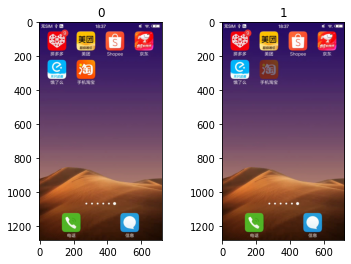

In [1]:
# simple template match with CCORR_NORMED

import cv2
import toolbox

img0 = cv2.imread("testdata/before-click.jpg")
img1 = cv2.imread("testdata/after-click.jpg")

toolbox.show_image([img0, img1])

In [2]:
# https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_imgproc/py_template_matching/py_template_matching.html

def match_template(image: toolbox.TImage, template: toolbox.TImage, mask=None):
    """
    Optional mask. It must have the same size as templ.
    It must either have the same number of channels as template or only one channel, which is then used for all template and image channels.
    If the data type is #CV_8U, the mask is interpreted as a binary mask, meaning only elements where mask is nonzero are used and are kept unchanged independent of the actual mask value (weight equals 1).
    For data tpye #CV_32F, the mask values are used as weights.
    The exact formulas are documented in #TemplateMatchModes.

    According to http://www.devsplanet.com/question/35658323, we can only use
    cv2.TM_SQDIFF or cv2.TM_CCORR_NORMED
    """
    method = cv2.TM_CCORR_NORMED

    # use transparent mask
    if mask is None and template.shape[2] == 4:
        mask = cv2.split(template.data)[3]

    res = cv2.matchTemplate(image.graydata, template.graydata, method, mask=mask)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    top_left = max_loc
    w, h = template.size

    bottom_right = (top_left[0] + w, top_left[1] + h)
    return {
        "sim": max_val,
        "box": top_left + bottom_right,
    }

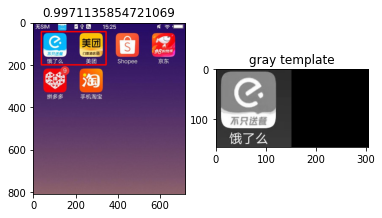

In [4]:
image = toolbox.imread("testdata/image-contains-elm.jpg", cv2.IMREAD_UNCHANGED)
template = toolbox.imread("testdata/elm.png", cv2.IMREAD_UNCHANGED)
# mask = cv2.split(template.data)[3]
#mask[mask == 0] = 1
#mask[mask == 255] = 0
res = match_template(image, template)#, mask=mask)
img2 = image.data.copy()
imgbox = image.rectangle(res['box'])
toolbox.show_image([imgbox, template.graydata], [res['sim'], 'gray template'])

